# READ ME
This is the data/file you need

**Look into the given zip file, containing...**
- an ontology

**Steps to do before running the Jupyter file**
- Open GraphDB
- Create a repository called "FinalProject"
- Unpload in the repository the given ontology file
- Save the data there and then come back to jupyter and run the next cells

In [1]:
%pip install ipython-sparql-pandas
#run `sparql?` in a cell for documentation
%load_ext ipython_sparql_pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\Hari\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium


In [3]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# Which are the top world Artists?
We want to answer this question in order to help journalists find out who are the most popular artists based on their revenue, song prizes, how collaborative they are and on their experience. This data will help the journalists to know on which artist they should focus to write more about, as people tend to be more interested in the most popular ones.

# 1) Top 10 artists with the highest ranking in general.
An artist's rank depends on how many awards they won during their career, or, in another words, how many songs of theirs were awarded.

In [58]:
%%sparql http://localhost:7200/repositories/FinalProject -s awards
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX mus: <http://www.semanticweb.org/no/ontologies/2022/9/MusicalArtists#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT ?Artist (COUNT(?award) as ?awards)
WHERE
{
    ?artist rdf:type mus:Artist .
    ?artist dbo:Name ?Artist .
    SERVICE <https://dbpedia.org/sparql> {
        ?singer foaf:name ?Artist .
        ?award dbo:artist ?singer .
    }   
}
GROUP BY ?Artist
ORDER BY Desc(?awards)
LIMIT 10

,Artist,awards
0,Drake,106
1,Eminem,94
2,Enrique Iglesias,67
3,Selena Gomez,36
4,Avicii,33
5,Sam Smith,33
6,Dua Lipa,26
7,Doja Cat,25


### 1) Visualisation

<AxesSubplot: xlabel='Artist'>

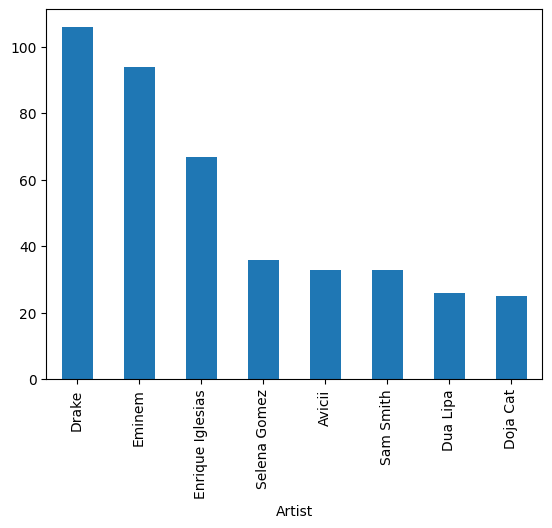

In [59]:
awards.set_index('Artist', inplace=True)
awards['awards'].plot.bar()

# 2) Top 10 artists with the most experience.
An artist's experience is determined by how many songs they have released in their career.

(Note: if an artist released a song, it doesn't necessarily mean they wrote it, because it could also be a cover, or a song written by a collaborating artist.)

In [37]:
%%sparql http://localhost:7200/repositories/FinalProject -s experience
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX mus: <http://www.semanticweb.org/no/ontologies/2022/9/MusicalArtists#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT ?Artist (COUNT(?Song) as ?HitNumber)
WHERE
{
    ?artist rdf:type mus:Artist .
    ?artist dbo:Name ?Artist .
    SERVICE <https://dbpedia.org/sparql> {
        ?singer foaf:name ?Artist .
        ?Song dbo:artist ?singer .
    }   
}
GROUP BY ?Artist
ORDER BY DESC(?HitNumber)
LIMIT 10

,Artist,HitNumber
0,Drake,106
1,Eminem,94
2,Enrique Iglesias,67
3,Selena Gomez,36
4,Avicii,33
5,Sam Smith,33
6,Dua Lipa,26
7,Doja Cat,25


### 2) Visualisation




<AxesSubplot: ylabel='HitNumber'>

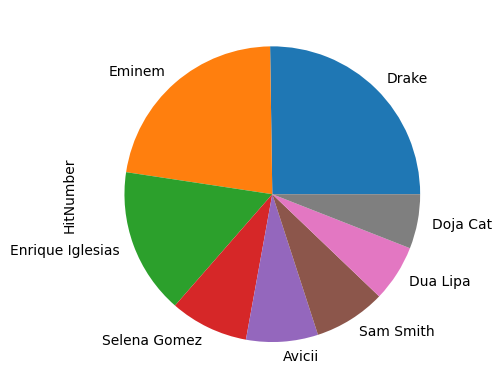

In [38]:
experience.set_index('Artist', inplace=True)
experience['HitNumber'].plot.pie()

# 3) Top 3 artists with the largest variety of musical genres.
This will give a great input of the versatility an artist has. Usually artists focus just on one genre, so having artists who are able to sing multiple different genres will create a greate article.

In [40]:
%%sparql http://localhost:7200/repositories/FinalProject -s variety
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX mus: <http://www.semanticweb.org/no/ontologies/2022/9/MusicalArtists#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT ?Artist (COUNT(DISTINCT ?genre) as ?GenreNumber)
WHERE
{
    ?artist rdf:type mus:Artist .
    ?artist dbo:Name ?Artist .
    SERVICE <https://dbpedia.org/sparql> {
        ?singer foaf:name ?Artist .
        ?Song dbo:artist ?singer .
        ?Song dbo:genre ?genre .
    }     
}
GROUP BY ?Artist
ORDER BY DESC(?GenreNumber)
LIMIT 10

,Artist,GenreNumber
0,Dua Lipa,27
1,Enrique Iglesias,26
2,Drake,24
3,Eminem,18
4,Doja Cat,17
5,Sam Smith,17
6,Avicii,16


### 3) Visualisation

<AxesSubplot: ylabel='GenreNumber'>

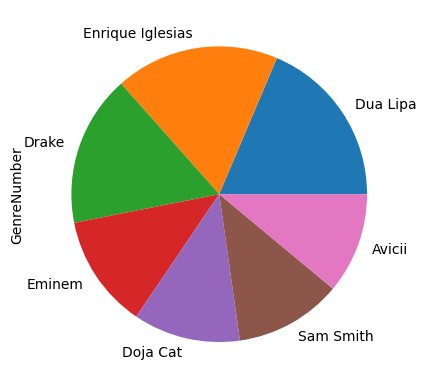

In [41]:
variety.set_index('Artist', inplace=True)
variety['GenreNumber'].plot.pie()

# 4) The artist with the higest NetWorth
This information will suggest who is the most financially successful artist.

In [42]:
%%sparql http://localhost:7200/repositories/FinalProject -s networth
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX mus: <http://www.semanticweb.org/no/ontologies/2022/9/MusicalArtists#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT ?Artist ?NetWorth
WHERE
{
    ?artist rdf:type mus:Artist .
    ?artist dbo:Name ?Artist .
    SERVICE <https://dbpedia.org/sparql> {
        ?singer foaf:name ?Artist .
        ?singer dbo:networth ?NetWorth .
    }   
}
GROUP BY ?Artist ?NetWorth
ORDER BY DESC(?networth)
LIMIT 1

,Artist,NetWorth
0,Drake,1.5E8


# 5)  Top 10 artists who wrote the most songs
This data will help the journalist to understand which artists really enjoy being part of the process of writing songs and making their song based on their own story.

(Note: writing songs is different from releasing a song, because one could also play a cover song, or a song written by an artist they collaborate with)

In [45]:
%%sparql http://localhost:7200/repositories/FinalProject -s songwriting
PREFIX ex: <http://example.com/kad/> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbp: <https://dbpedia.org/property/>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX mus: <http://www.semanticweb.org/no/ontologies/2022/9/MusicalArtists#>

Select ?Artist (Count(?Song) as ?WrittenSongs)
WHERE
{
    
    ?artist rdf:type mus:Artist.
    ?artist dbo:Name ?Artist.
    Service <https://dbpedia.org/sparql> {
        ?singer foaf:name ?Artist.
        ?Song dbo:writer ?singer.
        
    }   
   
}
Group By ?Artist 
Order By desc(?WrittenSongs)
LIMIT 10

,Artist,WrittenSongs
0,Eminem,133
1,Will Champion,76
2,Enrique Iglesias,52


### 5) Visualisation

<AxesSubplot: xlabel='Artist'>

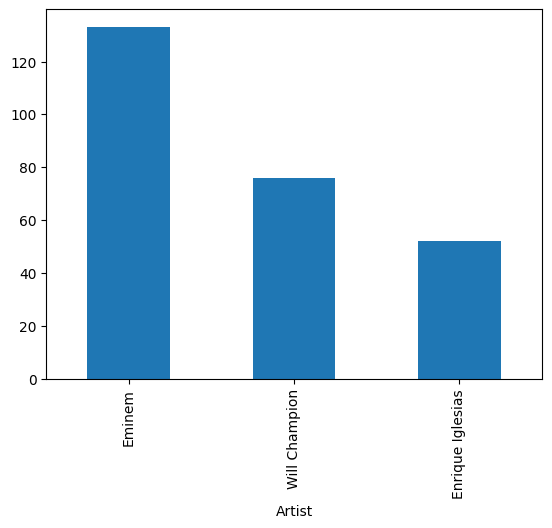

In [46]:
songwriting.set_index('Artist', inplace=True)
songwriting['WrittenSongs'].plot.bar()

# 6) Top 10 artists with the highest number of collaborations

This shows which artists enjoy working together with others the most.

In [47]:
%%sparql http://localhost:7200/repositories/FinalProject -s collaborations1
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX mus: <http://www.semanticweb.org/no/ontologies/2022/9/MusicalArtists#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT ?Artist (COUNT(?artists) as ?Collaborations)
WHERE
{
    ?artist rdf:type mus:Artist .
    ?artist dbo:Name ?Artist .
    SERVICE <https://dbpedia.org/sparql> {
        ?singer foaf:name ?Artist .
        {?artists dbo:associatedMusicalArtist ?singer .}
        UNION
        {?singer dbo:associatedMusicalArtist ?artists .}
    }   
}
GROUP BY ?Artist 
ORDER BY DESC(?Collaborations)
LIMIT 10

,Artist,Collaborations
0,Drake,80
1,Eminem,69
2,Avicii,34
3,Enrique Iglesias,24
4,Dua Lipa,17
5,Doja Cat,12


### 6) Visualisation

<AxesSubplot: ylabel='Collaborations'>

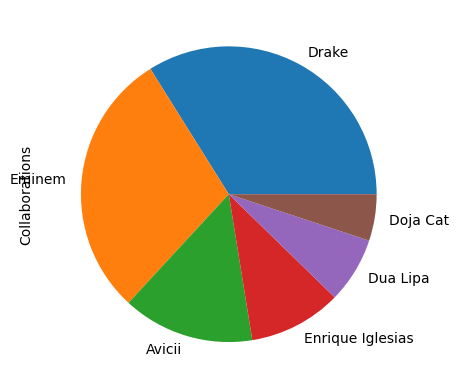

In [48]:
collaborations1.set_index('Artist', inplace=True)
collaborations1['Collaborations'].plot.pie()

# 7) Top 3 artists with the lowest number of collaborations

This shows the more independent artists, who prefer working alone to collaborating with others in music.

In [49]:
%%sparql http://localhost:7200/repositories/FinalProject -s collaborations2
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX mus: <http://www.semanticweb.org/no/ontologies/2022/9/MusicalArtists#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT ?Artist (COUNT(?artists) as ?Collaborations)
WHERE
{
    
    ?artist rdf:type mus:Artist .
    ?artist dbo:Name ?Artist .
    SERVICE <https://dbpedia.org/sparql> {
        ?singer foaf:name ?Artist .
        {?artists dbo:associatedMusicalArtist ?singer .}
        UNION
        {?singer dbo:associatedMusicalArtist ?artists .}
    }   
   
}
GROUP BY ?Artist 
ORDER BY ?Collaborations
LIMIT 3

,Artist,Collaborations
0,Doja Cat,12
1,Dua Lipa,17
2,Enrique Iglesias,24


### 7) Visualisation

<AxesSubplot: xlabel='Artist'>

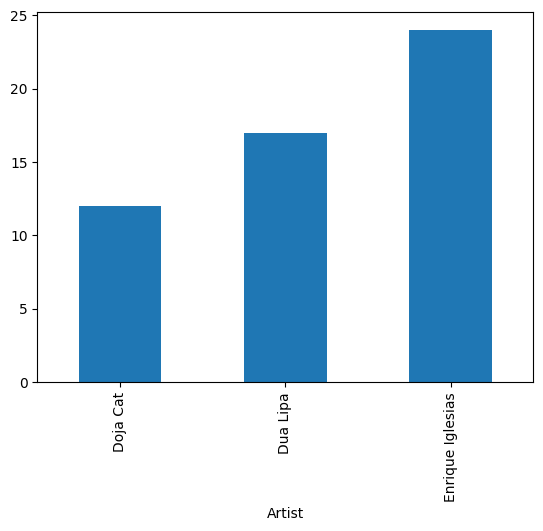

In [50]:
collaborations2.set_index('Artist', inplace=True)
collaborations2['Collaborations'].plot.bar()

# 8) Countries with the highest number of top artists
This information will help in order to determine which country has the highest number of popular artists.

In [52]:
%%sparql http://localhost:7200/repositories/FinalProject -s countries
PREFIX ex: <http://example.com/kad/> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbp: <https://dbpedia.org/property/>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX mus: <http://www.semanticweb.org/no/ontologies/2022/9/MusicalArtists#>

Select ?Country (Count(?artists) as ?BornInCountry)
WHERE
{
    ?artists rdf:type mus:Artist.
    ?artists mus:bornIn ?country.
    ?country rdfs:label ?Country
}
Group By ?Country
Order By DESC(?BornInCountry)

,Country,BornInCountry
0,United Kingdom,9
1,United States of America,7
2,Canada,4
3,Romania,3
4,Netherlands,2
5,Spain,2
6,Australia,1
7,Finland,1
8,France,1
9,Nigeria,1


### 8) Visualisation 1 (Pie Chart)

<AxesSubplot: ylabel='BornInCountry'>

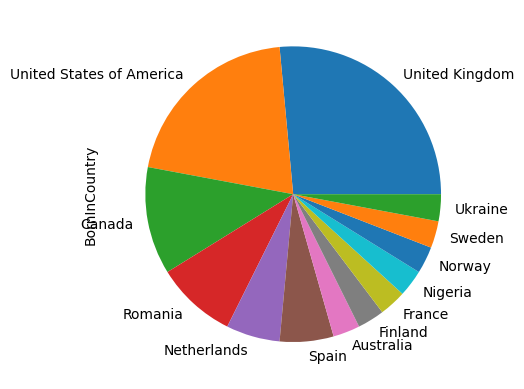

In [53]:
Country_label = countries['Country']
Number = countries['BornInCountry']
countries.set_index('Country', inplace=True)
countries['BornInCountry'].plot.pie()

### 8) Visualisation 2 (Map)

In [54]:
%%sparql http://query.wikidata.org/sparql -q -s capitals
SELECT DISTINCT ?country ?label_en ?coords WHERE {
   ?country wdt:P31 wd:Q6256.
   ?country rdfs:label ?label_en filter (lang(?label_en) = "en"). 
   ?country wdt:P36 ?capital . # capital: ?capital
   ?capital wdt:P625 ?coords 
    # Using Wikidata-only label service
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

In [ ]:
%pip install folium

In [55]:
import folium
# Extract latitude and longitude from coordinates in Well-Known Text (WKT) format
capitals_coords = capitals.join(capitals.coords.str.extract('Point\((?P<lon>\S+) (?P<lat>\S+)\)').astype(float))


middle = [capitals_coords['lat'].mean(), capitals_coords['lon'].mean()]
m = folium.Map(location=middle, zoom_start=2)
i = -1
i =0
for _, row in capitals_coords.iterrows():
    for element in Country_label:
        if row['label_en'] == element:
            x = 10 * int(Number[i])
            i = i+1
            folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius= x,
            popup= row['country'],
            color="#3186cc",
            fill=True,
            fill_color="#3186cc",
            ).add_to(m)
  
    

m

# 9) Current bands of top artists
Artists don't always work alone, they may also perform music as part of a musical group / band. 

In [63]:
%%sparql http://localhost:7200/repositories/FinalProject -s bands
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX mus: <http://www.semanticweb.org/no/ontologies/2022/9/MusicalArtists#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT ?Artist
WHERE
{
    ?artist rdf:type mus:BandMember .
    ?artist dbo:Name ?Artist .
    ?artist mus:partOfBand ?band .
}
GROUP BY ?Artist ?Band

,Artist
0,Chris Martin
1,Eminem
2,Guy Berryman
3,Harry Styles
4,Jonny_Buckland
5,Will Champion


# 10) Top 10 artists whith the highest number of bands they have been in during their career.
Another way to determine which artists enjoy collaboration is to see how many bands they were in.

In [64]:
%%sparql http://localhost:7200/repositories/FinalProject -s bandcount
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX mus: <http://www.semanticweb.org/no/ontologies/2022/9/MusicalArtists#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT ?Artist (COUNT(?Band) as ?BandCount)
WHERE
{
    ?artist rdf:type mus:Artist .
    ?artist dbo:Name ?Artist .
    SERVICE <https://dbpedia.org/sparql> {
        ?singer foaf:name ?Artist .
        ?singer dbo:associatedBand ?Band .
    } 
}
GROUP BY ?Artist 
ORDER BY DESC(?BandCount)
LIMIT 10

,Artist,BandCount
0,Doja Cat,3


### 10) Visualisation

<AxesSubplot: ylabel='BandCount'>

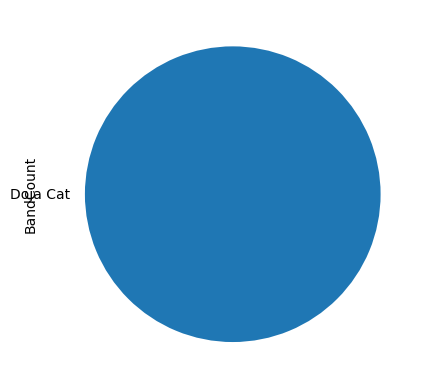

In [85]:
bandcount.set_index('Artist', inplace=True)
bandcount['BandCount'].plot.pie()